In [2]:
!pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=0f6ba6e3e5297362df28080631e35d0a8cf0d618e9e47add2e6e1475cc51893b
  Stored in directory: c:\users\saish\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking

   ---------------------------------------- 0/5 [peewee]
   ---------------- ----------------------- 2/5 [websockets]
   -------------------------------- ------- 4/5 [yfinance]
   ---------------------------------------- 5/5 [yfinance]



  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import yfinance as yf

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
!pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.9 MB/s eta 0:02:55
   ---------------------------------------- 0.8/332.0 MB 1.7 MB/s eta 0:03:20
   ---------------------------------------- 1.3/332.0 MB 1.7 MB/s eta 0:03:19
   ---------------------------------------- 1.6/332.0 MB 1.6 MB/s eta 0:03:21
   ---------------------------------------- 1.8/332.0 MB 1.6 MB/s eta 0:03:27
   ---------------------------------------- 2.1/332.0 MB 1.6 MB/s eta 0:03:32
   ---------------------------------------- 2.4/332.0 MB 1.6 MB/s eta 0:03:33
   ---------------------------------------- 2.9/332.0 MB 1.6 MB/s eta 0:03:26
   ---------------------------------------- 3.1/332.0 MB 1.6 MB/s eta 0:03:25
   ---------------------------------------- 3.4/332.0 MB 1.6 MB/s eta 0:03:27
   ---------------------------------------- 3.7/332.0 MB 1.6 MB/s eta 0:03:31


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
ticker = "AAPL" # Apple Inc.
data = yf.download(ticker, start="2018-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [12]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.341896  40.351266  39.639320  39.850095  102223600
2018-01-03  40.334858  40.878185  40.271629  40.405116  118071600
2018-01-04  40.522202  40.625246  40.299720  40.407446   89738400
2018-01-05  40.983578  41.070228  40.526904  40.618239   94640000
2018-01-08  40.831345  41.126425  40.732981  40.831345   82271200


In [13]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1509 non-null   float64
 1   (High, AAPL)    1509 non-null   float64
 2   (Low, AAPL)     1509 non-null   float64
 3   (Open, AAPL)    1509 non-null   float64
 4   (Volume, AAPL)  1509 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.7 KB
None
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03
mean     107.824407   108.952048   106.584251   107.724451  1.073284e+08
std       50.934094    51.407897    50.406556    50.893120  5.513287e+07
min       33.799683    34.638791    33.754518    34.225178  2.404830e+07
25%       51.237423    52.040441    50.858421    51.374810  7.07837

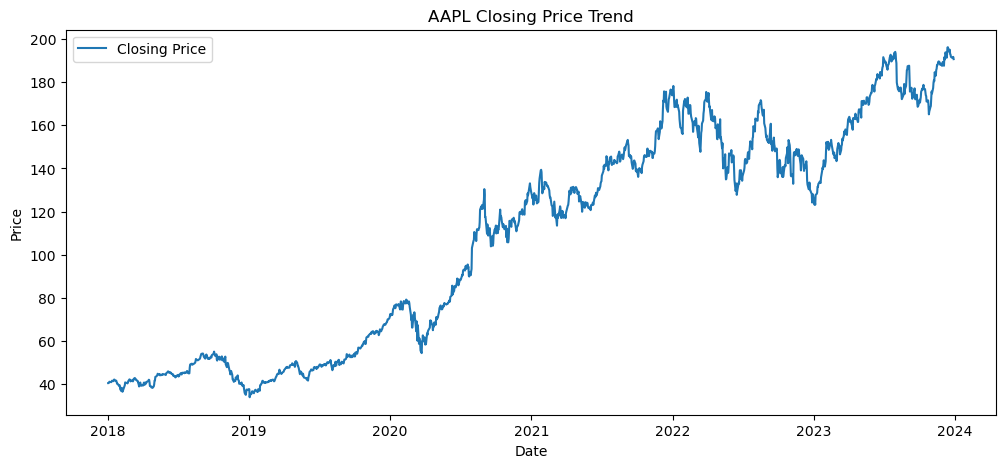

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'], label='Closing Price')
plt.title(f"{ticker} Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [15]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

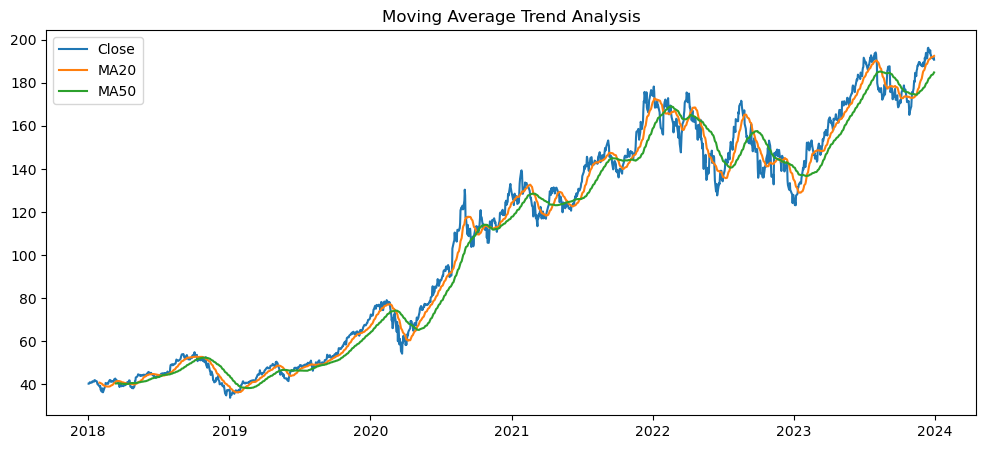

In [16]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA20'], label='MA20')
plt.plot(data['MA50'], label='MA50')
plt.legend()
plt.title("Moving Average Trend Analysis")
plt.show()

In [17]:
close_prices = data[['Close']].dropna()

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

In [20]:
def create_sequences(dataset, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(dataset)):
        X.append(dataset[i-seq_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)


In [21]:
X, y = create_sequences(scaled_data)

In [22]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [23]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [24]:
model = Sequential([
LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
Dropout(0.2),
LSTM(50),
Dropout(0.2),
Dense(1)
])

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
X_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.1,
verbose=1
)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0307 - val_loss: 0.0039
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0020 - val_loss: 0.0019


In [27]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [28]:
actual = scaler.inverse_transform(y_test.reshape(-1,1))

In [29]:
rmse = np.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)

In [30]:
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 8.826145925248156
MAE: 7.779825881431843


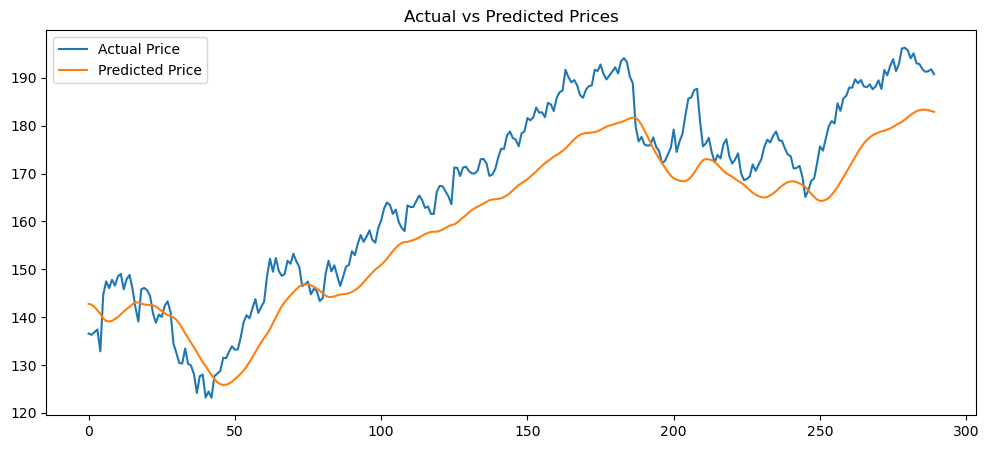

In [31]:
plt.figure(figsize=(12,5))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()